# Importacion Librerías y de la base de datos

In [ ]:
#Librerias

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, r2_score, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import neighbors
from sklearn import tree


 
from scipy.stats import ttest_ind, mannwhitneyu, norm
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats import diagnostic

from google.colab import files
  #plt.savefig("abc.png")
  #files.download("abc.png") 


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
pip install --upgrade scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Data_sets/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Limpieza  de columnas

## Pregnancies

In [ ]:
data.Pregnancies.describe()

count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: Pregnancies, dtype: float64

In [ ]:
data.Pregnancies.value_counts()*100/len(data) 
# dejar el 80%- Ley de pareto
# de tener tiempo, analisar los casos aislados

1     17.578125
0     14.453125
2     13.411458
3      9.765625
4      8.854167
5      7.421875
6      6.510417
7      5.859375
8      4.947917
9      3.645833
10     3.125000
11     1.432292
13     1.302083
12     1.171875
14     0.260417
15     0.130208
17     0.130208
Name: Pregnancies, dtype: float64

In [ ]:
np.sort(data.Pregnancies.unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 17])

In [ ]:
preg = data.Pregnancies.value_counts()

<BarContainer object of 17 artists>

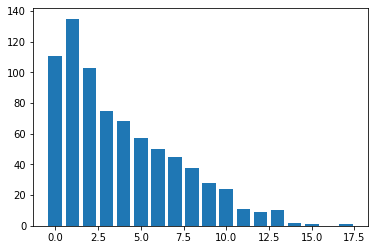

In [ ]:
plt.bar(preg.index, preg.values)


{'boxes': [<matplotlib.lines.Line2D at 0x7fc1f346e190>],
 'caps': [<matplotlib.lines.Line2D at 0x7fc1f33fbc50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fc1f3400c90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fc1f3400750>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fc1f33fb1d0>,
  <matplotlib.lines.Line2D at 0x7fc1f33fb710>]}

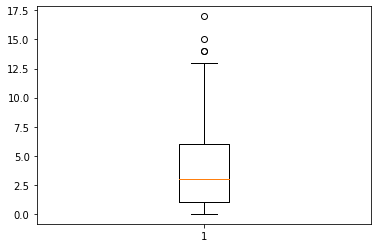

In [ ]:
plt.boxplot(data.Pregnancies)
#eliinar los valores sobresalientes

In [ ]:
data.Pregnancies.describe()

count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: Pregnancies, dtype: float64

## Glucose

In [ ]:
data.Glucose.describe()

count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64

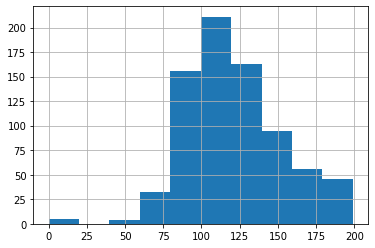

In [ ]:
data.Glucose.hist()
#porque hay un cero y un 50?

In [ ]:
data.Glucose.value_counts()

99     17
100    17
111    14
129    14
125    14
       ..
191     1
177     1
44      1
62      1
190     1
Name: Glucose, Length: 136, dtype: int64

In [ ]:
data[data.Glucose==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [ ]:
data.Glucose.mean()

120.89453125

In [ ]:
data.Glucose.replace(0, data.Glucose.mean(), inplace=True)

In [ ]:
data[data.Glucose==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


{'boxes': [<matplotlib.lines.Line2D at 0x7fc1f32f23d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fc1f3293890>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fc1f329a8d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fc1f329a390>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fc1f328fdd0>,
  <matplotlib.lines.Line2D at 0x7fc1f3293350>]}

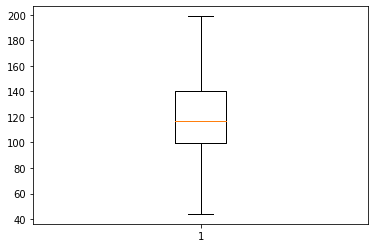

In [ ]:
plt.boxplot(data.Glucose)
#No hay valores sobresalietes

In [ ]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

## BloodPlessure


In [ ]:
data.BloodPressure.describe()

count    768.000000
mean      69.105469
std       19.355807
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

In [ ]:
data.BloodPressure.unique()

array([ 72,  66,  64,  40,  74,  50,   0,  70,  96,  92,  80,  60,  84,
        30,  88,  90,  94,  76,  82,  75,  58,  78,  68, 110,  56,  62,
        85,  86,  48,  44,  65, 108,  55, 122,  54,  52,  98, 104,  95,
        46, 102, 100,  61,  24,  38, 106, 114])

In [ ]:
len(data[data.BloodPressure<1])

35

In [ ]:
data.BloodPressure.replace(0, data.BloodPressure.mean(), inplace= True)

In [ ]:
data[data.BloodPressure==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


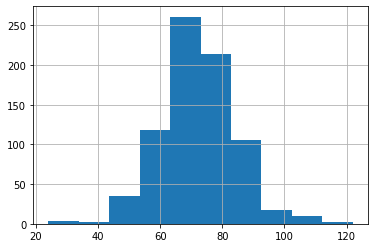

In [ ]:
data.BloodPressure.hist()

{'boxes': [<matplotlib.lines.Line2D at 0x7fc1f3176d10>],
 'caps': [<matplotlib.lines.Line2D at 0x7fc1f319af50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fc1f31a2f90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fc1f31a2a50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fc1f319a4d0>,
  <matplotlib.lines.Line2D at 0x7fc1f319aa10>]}

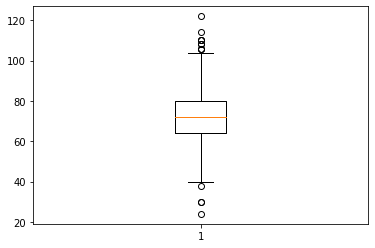

In [ ]:
plt.boxplot(data.BloodPressure)

## SkinThickness

---


Triceps skin fold thickness (mm). A value used to estimate body fat, measured on the right arm halfway between the olecranon process of the elbow and the acromial process of the scapula. Normal thickness in males is 12 mm; in females, 23 mm.

In [ ]:
data.SkinThickness.describe()

count    768.000000
mean      20.536458
std       15.952218
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64

In [ ]:
data.SkinThickness.unique()

array([35, 29,  0, 23, 32, 45, 19, 47, 38, 30, 41, 33, 26, 15, 36, 11, 31,
       37, 42, 25, 18, 24, 39, 27, 21, 34, 10, 60, 13, 20, 22, 28, 54, 40,
       51, 56, 14, 17, 50, 44, 12, 46, 16,  7, 52, 43, 48,  8, 49, 63, 99])

In [ ]:
data[data.SkinThickness==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2,8,183.0,64.000000,0,0,23.3,0.672,32,1
5,5,116.0,74.000000,0,0,25.6,0.201,30,0
7,10,115.0,69.105469,0,0,35.3,0.134,29,0
9,8,125.0,96.000000,0,0,0.0,0.232,54,1
10,4,110.0,92.000000,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
757,0,123.0,72.000000,0,0,36.3,0.258,52,1
758,1,106.0,76.000000,0,0,37.5,0.197,26,0
759,6,190.0,92.000000,0,0,35.5,0.278,66,1
762,9,89.0,62.000000,0,0,22.5,0.142,33,0


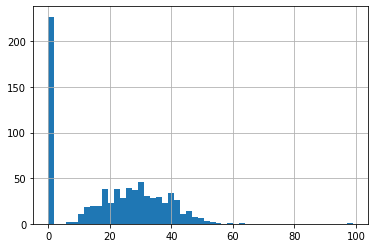

In [ ]:
data.SkinThickness.hist(bins= len(data.SkinThickness.unique()))
#predomina el cero, a pesar de que lo normal es 23, se entiende que hay datos faltantes

In [ ]:
#¿qué puede estar relacionada con la grasa corporal
miss_values= data.groupby(['Pregnancies', 'Glucose', 'BMI', 'Age'], as_index=False)['SkinThickness'].mean()
miss_values= miss_values.sort_values('Age')

In [ ]:
#de 20 a 30
miss_values[(miss_values.Age>=20)&(miss_values.Age<31)&(miss_values.SkinThickness!=0)]['SkinThickness'].mean()

27.828220858895705

In [ ]:
data.loc[(data.Age>=20)&(data.Age<31)&(data.SkinThickness==0),'SkinThickness']= 27.82


In [ ]:
#de 30 a 40
data[(data.Age>=31)&(data.Age<41)&(data.SkinThickness!=0)]['SkinThickness'].mean()

31.310679611650485

In [ ]:
data.loc[(data.Age>=31)&(data.Age<41)&(data.SkinThickness==0), 'SkinThickness'] = 31.31


In [ ]:
#de 40 a 50
miss_values[(miss_values.Age>=40)&(miss_values.Age<51)&(miss_values.SkinThickness!=0)]['SkinThickness'].mean()

31.72151898734177

In [ ]:
data.loc[(data.Age>=41)&(data.Age<51)&(data.SkinThickness==0),'SkinThickness'] = 31.72


In [ ]:
#mas de 50
miss_values[(miss_values.Age>=51)&(miss_values.SkinThickness!=0)]['SkinThickness'].mean()

30.902439024390244

In [ ]:
data.loc[(data.Age>=51)&(data.SkinThickness==0),'SkinThickness'] = 30.90
#df.loc[df.A > 5, 'A'] = 1000


In [ ]:
data[data.SkinThickness==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


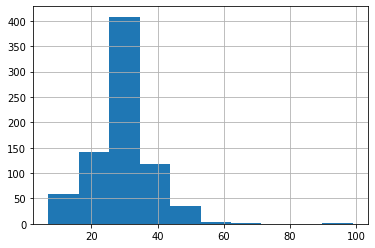

In [ ]:
data.SkinThickness.hist(bins=10)

##  Insulin 

In [ ]:
data.Insulin.describe()

count    768.000000
mean      79.799479
std      115.244002
min        0.000000
25%        0.000000
50%       30.500000
75%      127.250000
max      846.000000
Name: Insulin, dtype: float64

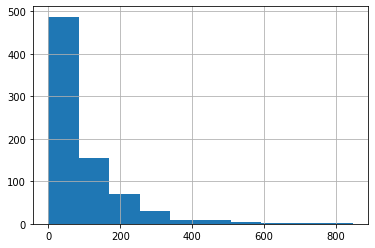

In [ ]:
data.Insulin.hist(bins= 10)

In [ ]:
data[data.Insulin==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.000000,35.00,0,33.6,0.627,50,1
1,1,85.0,66.000000,29.00,0,26.6,0.351,31,0
2,8,183.0,64.000000,31.31,0,23.3,0.672,32,1
5,5,116.0,74.000000,27.82,0,25.6,0.201,30,0
7,10,115.0,69.105469,27.82,0,35.3,0.134,29,0
...,...,...,...,...,...,...,...,...,...
761,9,170.0,74.000000,31.00,0,44.0,0.403,43,1
762,9,89.0,62.000000,31.31,0,22.5,0.142,33,0
764,2,122.0,70.000000,27.00,0,36.8,0.340,27,0
766,1,126.0,60.000000,31.72,0,30.1,0.349,47,1


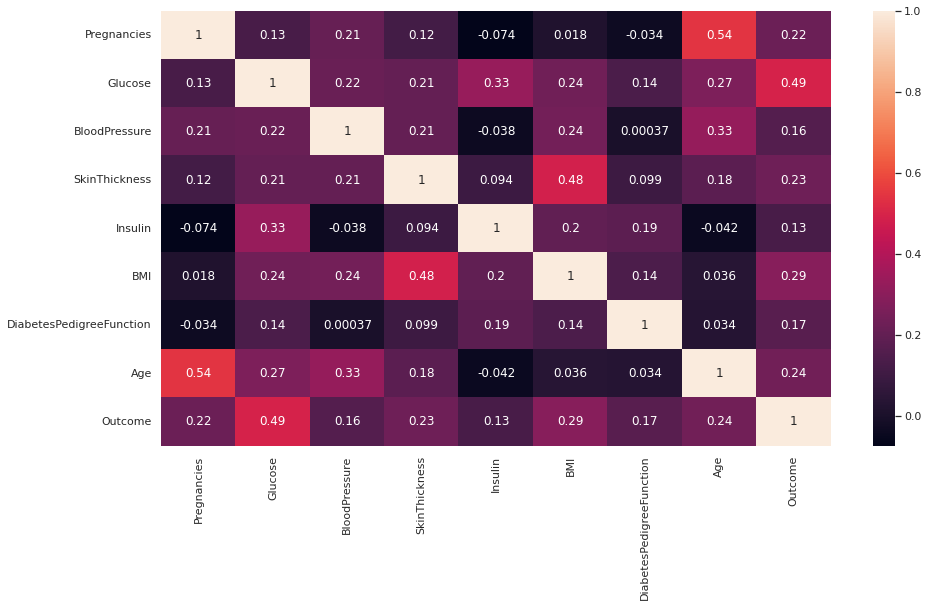

In [ ]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(data.corr(), annot= True)
#la mas correlacionada con insulina es glucosa

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc1f0584150>]],
      dtype=object)

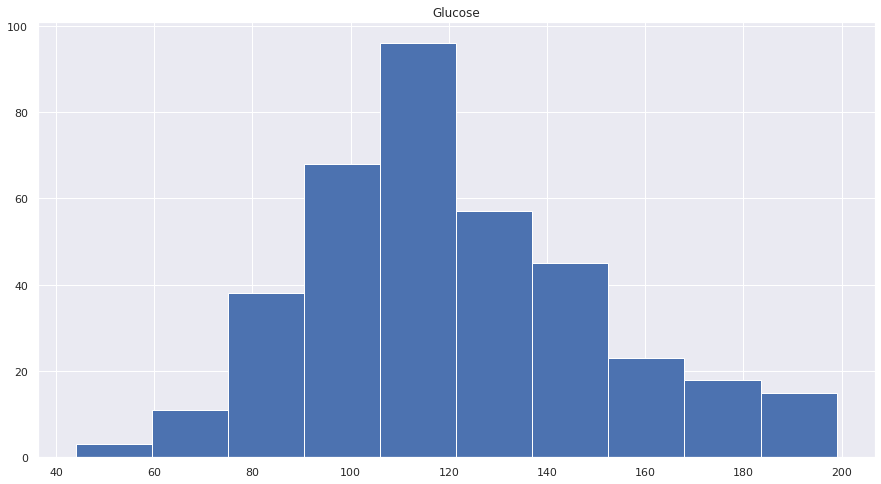

In [ ]:
data[(data.Insulin==0)].loc[:,['Glucose']].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc1eecb16d0>]],
      dtype=object)

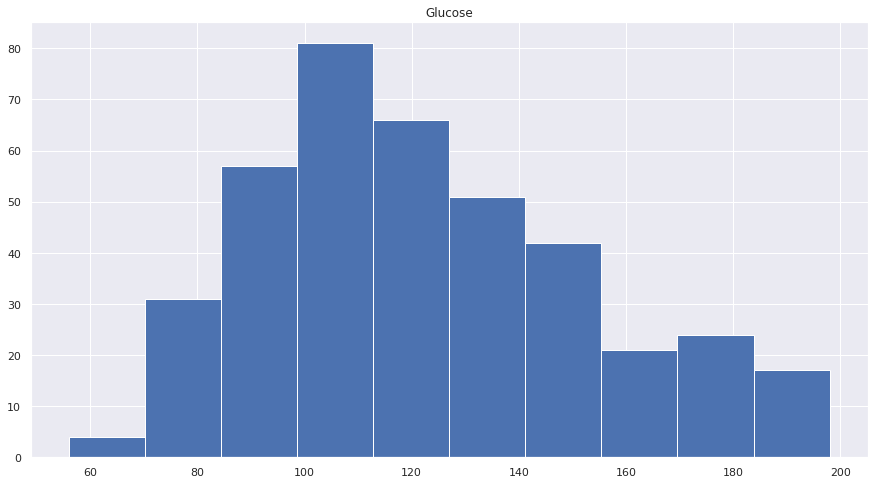

In [ ]:
data[(data.Insulin!=0)].loc[:,['Glucose']].hist()

In [ ]:
glu = data.Glucose.value_counts()
glu

99.0     17
100.0    17
111.0    14
129.0    14
125.0    14
         ..
191.0     1
177.0     1
44.0      1
62.0      1
190.0     1
Name: Glucose, Length: 136, dtype: int64

In [ ]:
mean_list= []
for i in glu.index:
  mean_list.append(data[(data.Glucose==i)&(data.Insulin!=0)].loc[:,['Insulin']].mean())

#mean_list

In [ ]:
mean_list= [j for i in mean_list for j in i]
mean_list

[72.8,
 102.57142857142857,
 127.75,
 186.55555555555554,
 129.0,
 145.0,
 146.16666666666666,
 130.0,
 83.75,
 164.0,
 98.66666666666667,
 168.0,
 127.85714285714286,
 112.57142857142857,
 276.1666666666667,
 52.75,
 76.0,
 156.71428571428572,
 118.16666666666667,
 128.5,
 198.33333333333334,
 118.0,
 90.66666666666667,
 218.0,
 142.75,
 141.66666666666666,
 52.375,
 103.25,
 132.66666666666666,
 132.42857142857142,
 139.8,
 163.66666666666666,
 133.4,
 73.4,
 214.6,
 292.5,
 158.0,
 118.0,
 84.0,
 97.0,
 193.6,
 49.0,
 59.0,
 293.0,
 124.0,
 200.33333333333334,
 51.25,
 311.4,
 57.4,
 65.0,
 212.75,
 100.0,
 211.75,
 168.6,
 112.0,
 111.5,
 60.25,
 112.5,
 137.66666666666666,
 365.2,
 nan,
 243.75,
 244.66666666666666,
 211.66666666666666,
 128.0,
 135.0,
 155.5,
 85.0,
 58.0,
 290.5,
 334.0,
 23.0,
 144.5,
 147.5,
 197.5,
 367.6666666666667,
 157.33333333333334,
 277.5,
 321.0,
 64.0,
 43.333333333333336,
 60.5,
 643.5,
 275.75,
 585.5,
 175.0,
 264.5,
 277.0,
 67.0,
 187.5,
 68.0,


In [ ]:
for i in range(0,136):
  data.loc[(data.Glucose == glu.index[i]), 'Insulin'] = mean_list[i]
  #df.loc[df.A > 5, 'A'] = 1000


In [ ]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00,277.500000,33.6,0.627,50,1
1,1,85.0,66.0,29.00,49.000000,26.6,0.351,31,0
2,8,183.0,64.0,31.31,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.00,60.250000,28.1,0.167,21,0
4,0,137.0,40.0,35.00,158.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00,142.750000,32.9,0.171,63,0
764,2,122.0,70.0,27.00,168.000000,36.8,0.340,27,0
765,5,121.0,72.0,23.00,111.500000,26.2,0.245,30,0
766,1,126.0,60.0,31.72,132.428571,30.1,0.349,47,1


In [ ]:
data[(data.Glucose==85)&(data.Insulin!=0)].loc[:,['Insulin']].median()

Insulin    49.0
dtype: float64

In [ ]:
data.Insulin.isnull().sum()

32

In [ ]:
data.Insulin = data.Insulin.fillna(data.Insulin.mean())

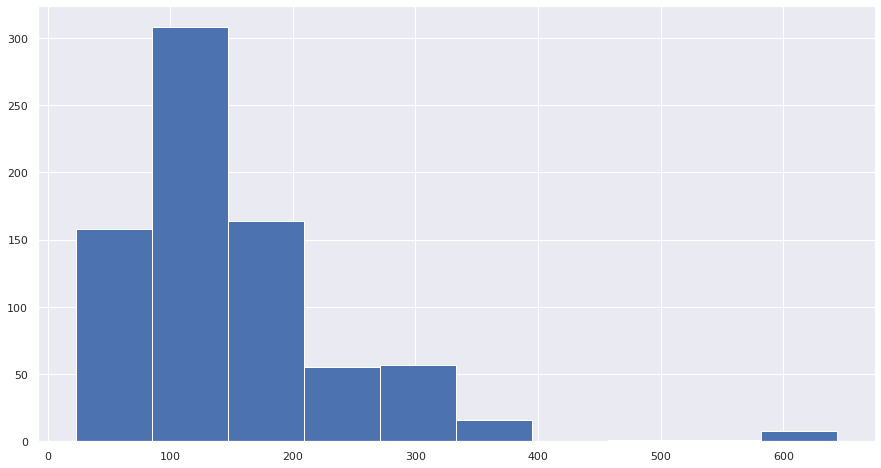

In [ ]:
data.Insulin.hist()

In [ ]:
data.Insulin.describe()

count    768.000000
mean     151.418256
std       87.020097
min       23.000000
25%      100.000000
50%      132.666667
75%      170.200000
max      643.500000
Name: Insulin, dtype: float64

In [ ]:
data.Insulin.isna().sum()

0

## BMI

In [ ]:
data.BMI.describe()

count    768.000000
mean      31.992578
std        7.884160
min        0.000000
25%       27.300000
50%       32.000000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64

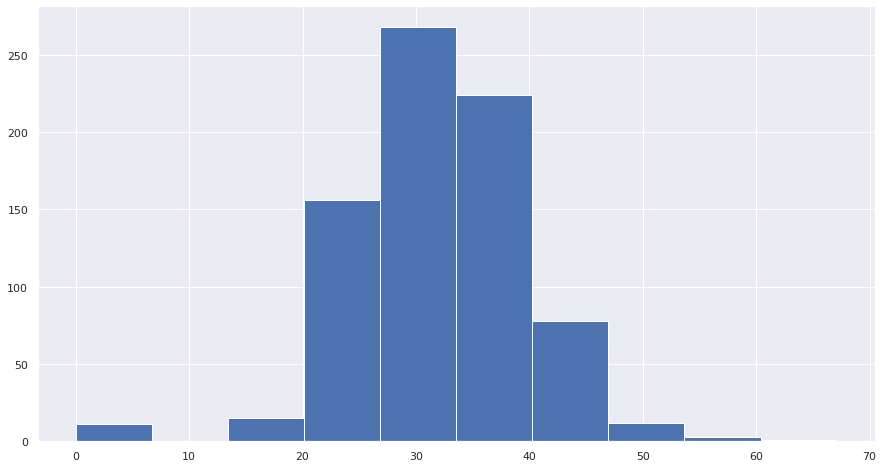

In [ ]:
data.BMI.hist()

In [ ]:
data[data.BMI==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125.0,96.000000,30.90,129.000000,0.0,0.232,54,1
49,7,105.0,69.105469,27.82,164.000000,0.0,0.305,24,0
60,2,84.0,69.105469,27.82,90.666667,0.0,0.304,21,0
81,2,74.0,69.105469,27.82,43.333333,0.0,0.102,22,0
145,0,102.0,75.000000,23.00,98.666667,0.0,0.572,21,0
371,0,118.0,64.000000,23.00,137.666667,0.0,1.731,21,0
426,0,94.0,69.105469,27.82,84.000000,0.0,0.256,25,0
494,3,80.0,69.105469,27.82,65.000000,0.0,0.174,22,0
522,6,114.0,69.105469,27.82,198.333333,0.0,0.189,26,0
684,5,136.0,82.000000,30.90,133.400000,0.0,0.640,69,0


In [ ]:
data.BMI.replace(0, data.BMI.mean(), inplace=True)

{'boxes': [<matplotlib.lines.Line2D at 0x7fc1eebe5ad0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fc1eeb1c550>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fc1eeb23590>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fc1eeb23050>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fc1eeb17a90>,
  <matplotlib.lines.Line2D at 0x7fc1eeb17fd0>]}

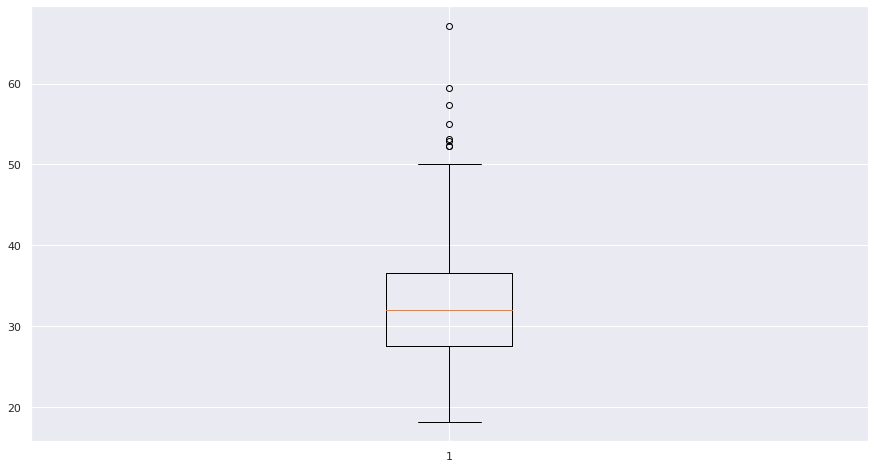

In [ ]:
plt.boxplot(data.BMI)

## DiabetesPedigreeFunction

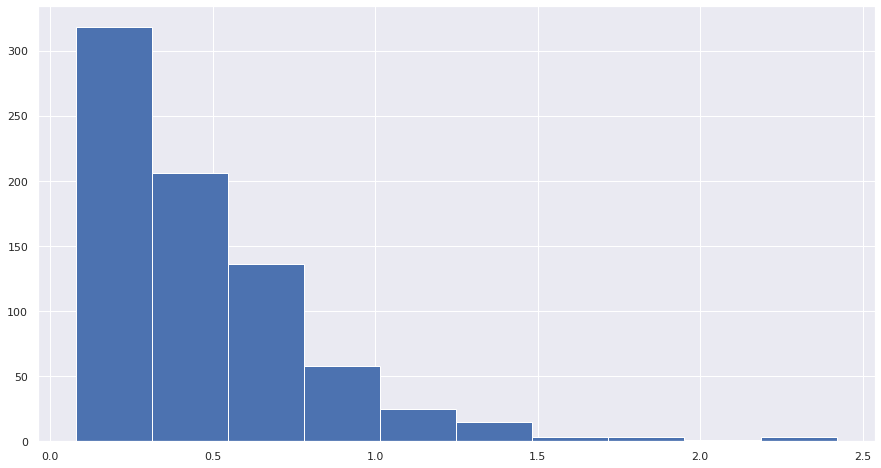

In [ ]:
data.DiabetesPedigreeFunction.hist()

In [ ]:
data.DiabetesPedigreeFunction.unique()

array([0.627, 0.351, 0.672, 0.167, 2.288, 0.201, 0.248, 0.134, 0.158,
       0.232, 0.191, 0.537, 1.441, 0.398, 0.587, 0.484, 0.551, 0.254,
       0.183, 0.529, 0.704, 0.388, 0.451, 0.263, 0.205, 0.257, 0.487,
       0.245, 0.337, 0.546, 0.851, 0.267, 0.188, 0.512, 0.966, 0.42 ,
       0.665, 0.503, 1.39 , 0.271, 0.696, 0.235, 0.721, 0.294, 1.893,
       0.564, 0.586, 0.344, 0.305, 0.491, 0.526, 0.342, 0.467, 0.718,
       0.962, 1.781, 0.173, 0.304, 0.27 , 0.699, 0.258, 0.203, 0.855,
       0.845, 0.334, 0.189, 0.867, 0.411, 0.583, 0.231, 0.396, 0.14 ,
       0.391, 0.37 , 0.307, 0.102, 0.767, 0.237, 0.227, 0.698, 0.178,
       0.324, 0.153, 0.165, 0.443, 0.261, 0.277, 0.761, 0.255, 0.13 ,
       0.323, 0.356, 0.325, 1.222, 0.179, 0.262, 0.283, 0.93 , 0.801,
       0.207, 0.287, 0.336, 0.247, 0.199, 0.543, 0.192, 0.588, 0.539,
       0.22 , 0.654, 0.223, 0.759, 0.26 , 0.404, 0.186, 0.278, 0.496,
       0.452, 0.403, 0.741, 0.361, 1.114, 0.457, 0.647, 0.088, 0.597,
       0.532, 0.703,

In [ ]:
data[data.DiabetesPedigreeFunction==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


{'boxes': [<matplotlib.lines.Line2D at 0x7fc1eeab4d90>],
 'caps': [<matplotlib.lines.Line2D at 0x7fc1ee9f3f90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fc1ee9fafd0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fc1ee9faa90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fc1ee9f3510>,
  <matplotlib.lines.Line2D at 0x7fc1ee9f3a50>]}

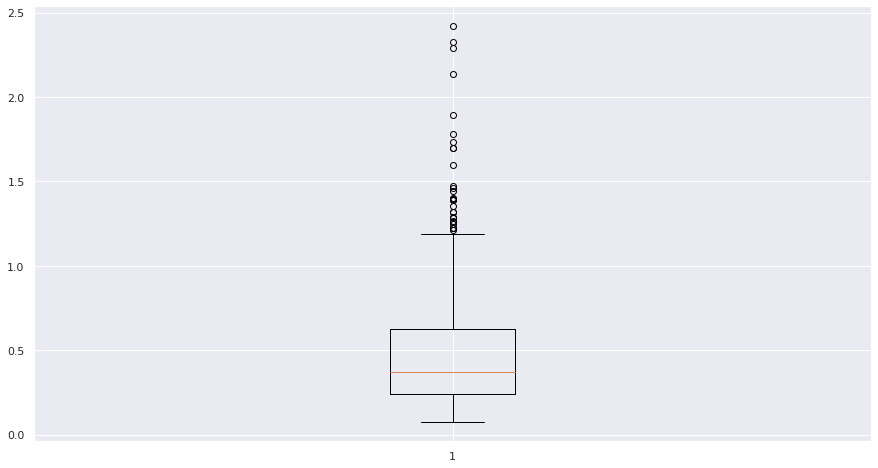

In [ ]:
plt.boxplot(data.DiabetesPedigreeFunction)

## Age

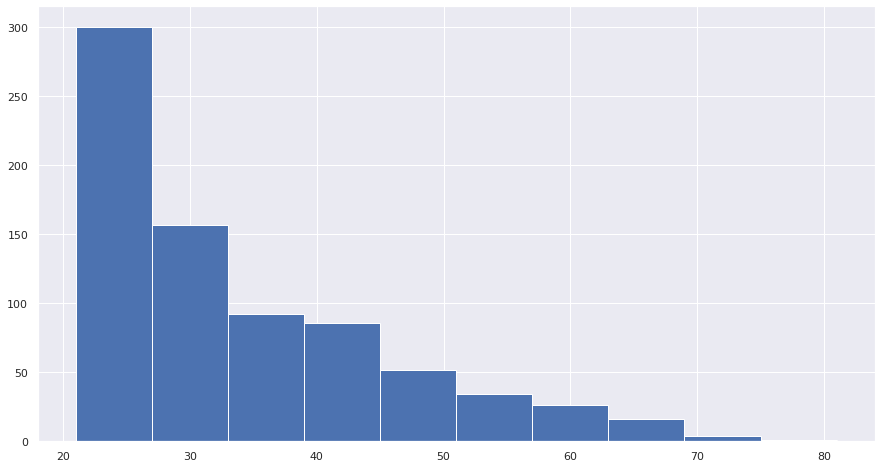

In [ ]:
data.Age.hist()

In [ ]:
data.Age.unique()

array([50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 34, 57, 59, 51, 27, 41, 43,
       22, 38, 60, 28, 45, 35, 46, 56, 37, 48, 40, 25, 24, 58, 42, 44, 39,
       36, 23, 61, 69, 62, 55, 65, 47, 52, 66, 49, 63, 67, 72, 81, 64, 70,
       68])

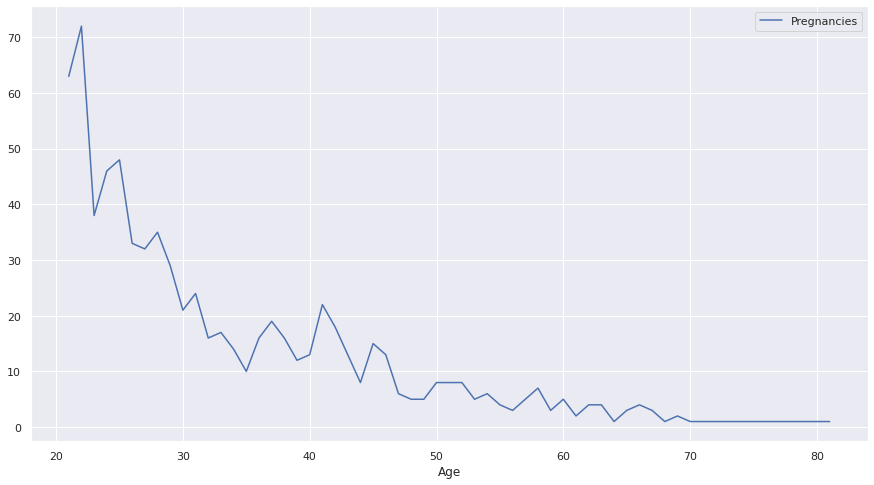

In [ ]:
data.groupby('Age').agg({'Pregnancies':'count'}).plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc1f2ef4190>]],
      dtype=object)

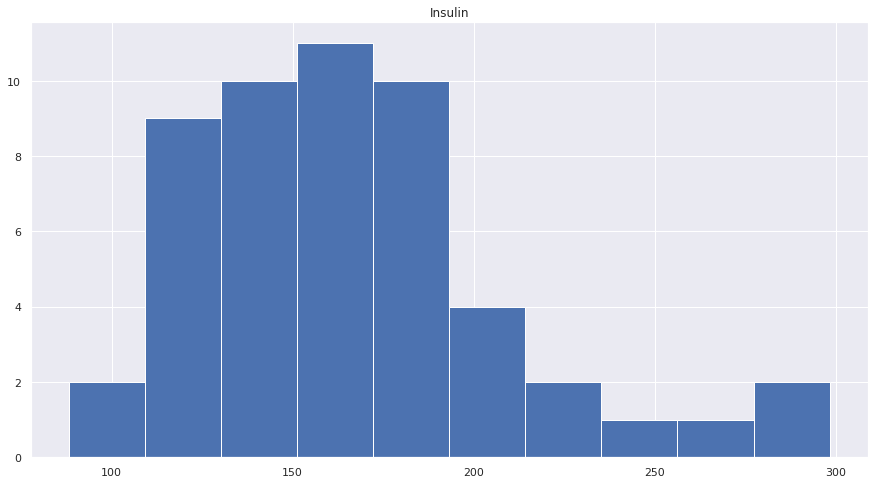

In [ ]:
data.groupby('Age').agg({'Insulin': 'mean'}).hist()

## Outcome

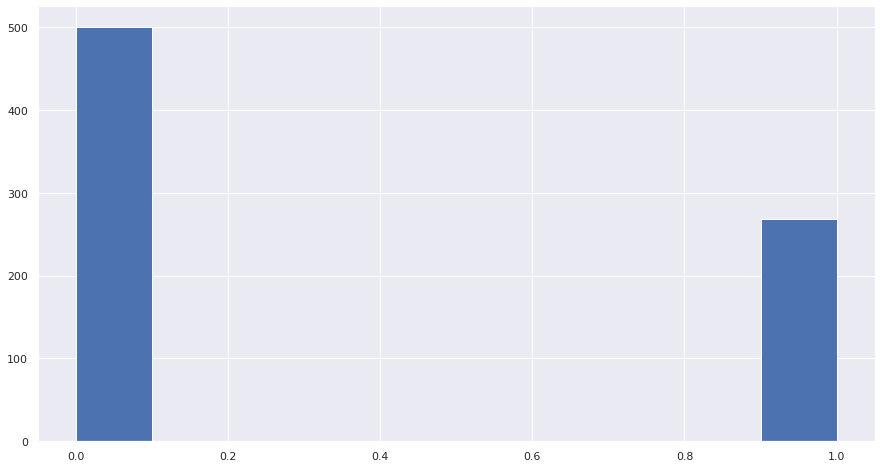

In [ ]:
data.Outcome.hist()

In [ ]:
data.Outcome.value_counts()
#500 negativos y 268 positivos. 

0    500
1    268
Name: Outcome, dtype: int64

# Test de Hipotesis

## Correlaciones

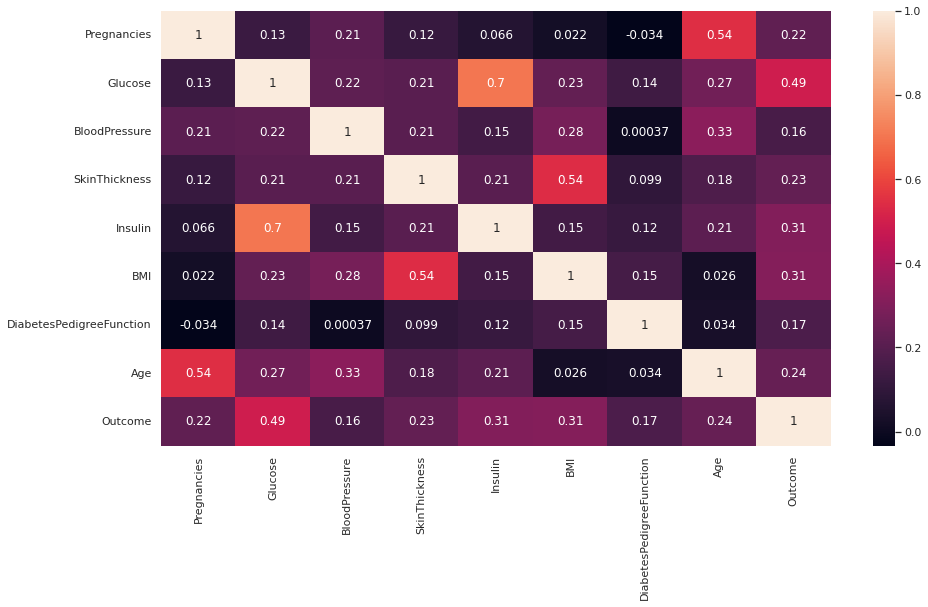

In [ ]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(data.corr(), annot=True, )
plt.show();

In [ ]:
corr = data.corr()
corr['Outcome'].sort_values(ascending = False)[1:4]



Glucose    0.492908
BMI        0.312254
Insulin    0.308541
Name: Outcome, dtype: float64

## Test de Hipótesis



## GLUCOSA


### Prueba Z

Ho: medias iguales dentro de la poblacion

Ha: medias diferentes dentro de la poblacion

#### Personas no diabeticas 

In [ ]:
data.groupby('Outcome').agg({'Glucose':'mean'})

,Glucose
Outcome,
0,110.705367
1,142.159661


In [ ]:
data.Glucose.mean() #BUSCAR LA MEDIA DE LA POBLACION DE GLUCOSA DE LA INDIA

121.68160502115886

In [ ]:
#Glucosa de pacientes no diabeticos

glucosa = data[data.Outcome==0]['Glucose']
mu = glucosa.mean()
sigma = glucosa.std()

In [ ]:
n = 150 #eleccion aleatoria
x_bar =  121.68
error_std = sigma/ np.sqrt(n)
estadistico_z = (x_bar - mu) /error_std
estadistico_z

5.438443776358993

In [ ]:
region_crítica_95 = 1.96 #tabla z


Como es mayor al punto crítico, esta alejada la media poblacional de la glucosa de los pacientes no diabeticos contra la media poblacional general. Por lo tanto, se rechaza la hipotesis nula. La media poblacional de la glucosa de las personas no diabeticas es diferente a la media poblacional. 


#### Personas diabeticas

In [ ]:
glucosa_1 = data[data.Outcome== 1]['Glucose']
mu = glucosa_1.mean()
sigma = glucosa_1.std()

In [ ]:
n = 100 #eleccion arbitraria, como son menos, se hizo una menos seleccion
x_bar =  121.68
error_std = sigma/ np.sqrt(n)
estadistico_z = (x_bar - mu) /error_std
estadistico_z

-6.9314629240866665

In [ ]:
region_crítica_95 = -1.96 #tabla z


Como se buscaba que la media fuera diferente, no mayor ni menor a la media poblacional, se escogió un contraste bilateral, por lo tanto, como nuestro estadístico z es menos a la región crítica, esta dentro de la zoncrítica, por lo tanto se rechaza la hipotesis nula que las medias de la glucosa de la muestra diabetica sean iguales a la media poblacional. 

### Prueba de Hipotesis con dos muestras 


---
Ho: Niveles de glucosa == diabeticos y no diabeticos

Ha: Niveles de glucosa != diabeticos y no diabeticos

In [ ]:
glucosa_nd = data[data.Outcome==0]['Glucose'] #500
glucosa_d = data[data.Outcome== 1]['Glucose'] #268

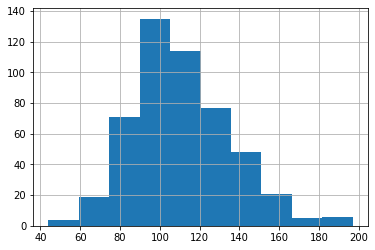

In [ ]:
glucosa_nd.hist()

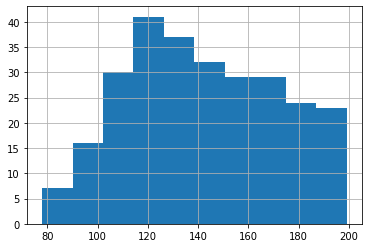

In [ ]:
glucosa_d.hist()

In [ ]:
prebox = data.groupby('Outcome', as_index=False).agg({'Glucose':'mean'})
prebox

,Outcome,Glucose
0,0,110.705367
1,1,142.159661


In [ ]:
prebox.values

array([[110.70536719],
       [142.15966068]])

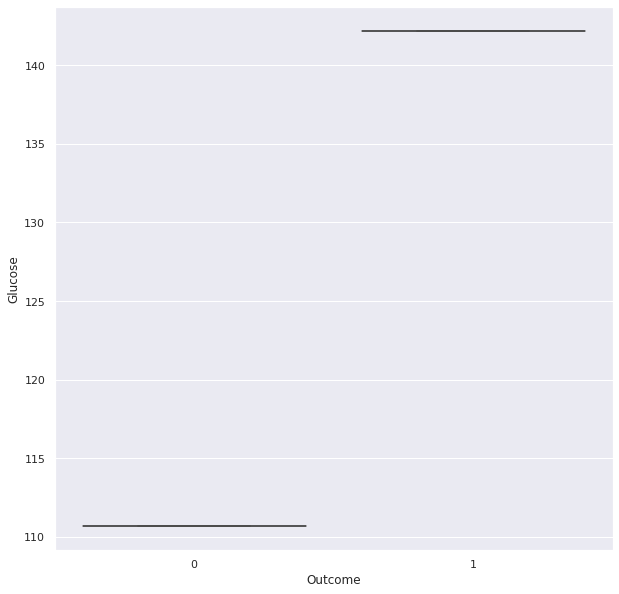

In [ ]:
sns.boxplot(x= prebox.Outcome, y= prebox.Glucose)

In [ ]:

ttest_ind(glucosa_d, glucosa_nd, equal_var=False, alternative= 'greater')
# Se rechaza la Ho 
# Se puede afirmar que la media de los niveles de glucosa entre la poblacion diabetica y no diabetica es diferente con una significación del 5%.
# greater’: the mean of the distribution underlying the first sample is greater than the mean of the distribution underlying the second sample.

Ttest_indResult(statistic=14.86243530828544, pvalue=1.5817663649070234e-41)

## BMI

### Prueba Z

---

Ho: medias iguales dentro de la poblacion

Ha: medias diferentes dentro de la poblacion

#### Personas no diabéticas

In [ ]:
data.groupby('Outcome').agg({'BMI':'mean'})

,BMI
Outcome,
0,30.880066
1,35.381288


In [ ]:
data.BMI.mean()

32.45080515543617

In [ ]:
bmi_0 = data[data.Outcome==0]['BMI']
mu = bmi_0.mean()
sigma = bmi_0.std()

In [ ]:
n = 150 # arbitrario
x_bar =  32.45
error_std = sigma/ np.sqrt(n)
estadistico_z = (x_bar - mu) /error_std
estadistico_z

2.956717071533555

In [ ]:
region_crítica_95 = 1.6

Como el estadistico z está por encima de la region crítica elegida, se rechaza la Ho, por lo tanto, la media poblacional del indice de masa corporal de las personas no diabéticas es diferente a la media poblacional de la población. 

#### Personas diabéticas

In [ ]:
bmi_1 = data[data.Outcome==1]['BMI']
mu = bmi_1.mean()
sigma = bmi_1.std()

In [ ]:
data.BMI.mean()

32.45080515543617

In [ ]:
n = 100 # arbitrario
x_bar =  32.45
error_std = sigma/ np.sqrt(n)
estadistico_z = (x_bar - mu) /error_std
estadistico_z

-4.443545124958026

In [ ]:
region_crítica_95 = -1.6


Como esta dentro de la zona crítica, se rechaza la Ho.

### Prueba de hipotesis con dos muestras

---

Ho: media BMI == diabeticos y no diabeticos

Ha: media BMI != diabeticos y no diabeticos

In [ ]:
bmi_0 = data[data.Outcome==0]['BMI'] #500
bmi_1 = data[data.Outcome== 1]['BMI'] #268

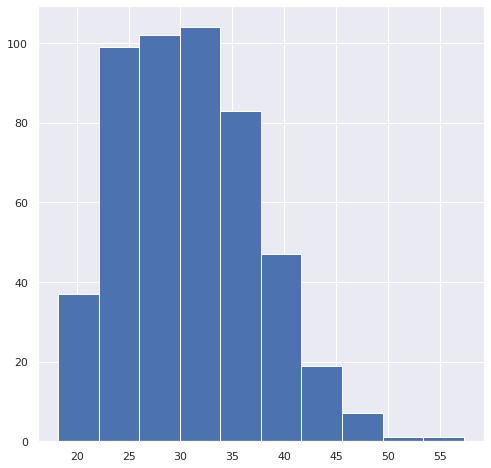

In [ ]:
plt.figure (figsize= (8,8))
bmi_0.hist()

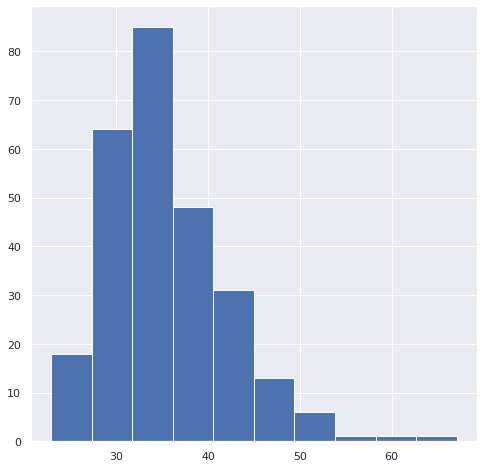

In [ ]:
plt.figure(figsize= (8,8))
bmi_1.hist()

In [ ]:
box = data.groupby('Outcome', as_index=False).agg({'BMI':'mean'})
box

,Outcome,BMI
0,0,30.880066
1,1,35.381288


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


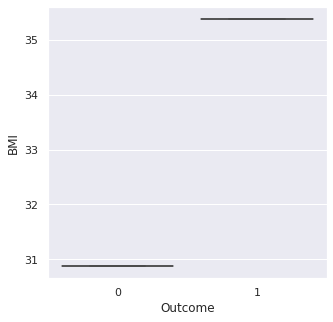

In [ ]:
sns.set(rc = {'figure.figsize':(5,5)})


x = box.Outcome
y = box.BMI

sns.boxplot (x, y)

In [ ]:
ttest_ind(bmi_0, bmi_1, equal_var=False, alternative= 'less')


Ttest_indResult(statistic=-9.057759892350074, pvalue=1.2177762298706174e-18)

las medias de los diferentes grupos es significativamente diferente con un valor de p=0.05  

‘less’: the mean of the distribution underlying the first sample is less than the mean of the distribution underlying the second sample

## INSULIN

### Prueba Z

#### Personas no diabéticas

In [ ]:
data.groupby('Outcome').agg({'Insulin':'mean'})

,Insulin
Outcome,
0,131.401640
1,188.949409


In [ ]:
data.Insulin.mean()

151.41825558574916

In [ ]:

in_0 = data[data.Outcome==0]['Insulin']
mu = in_0.mean()
sigma = in_0.std()

In [ ]:
n = 150 #eleccion aleatoria
x_bar =  151.41
error_std = sigma/ np.sqrt(n)
estadistico_z = (x_bar - mu) /error_std
estadistico_z

3.470044538790111

#### Personas diabétcas

In [ ]:
in_1 = data[data.Outcome==1]['Insulin']
mu = in_1.mean()
sigma = in_1.std()

In [ ]:
n = 100 #eleccion aleatoria
x_bar =  151.41
error_std = sigma/ np.sqrt(n)
estadistico_z = (x_bar - mu) /error_std
estadistico_z

-3.540707036756676

### Prueba de hipotesis con dos muestras

In [ ]:
insu_0 = data[data.Outcome==0]['Insulin'] #500
insu_1 = data[data.Outcome== 1]['Insulin'] #268

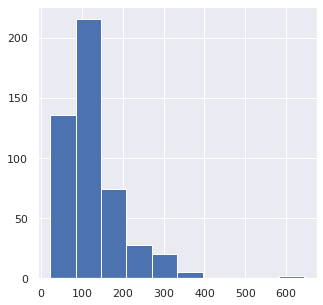

In [ ]:
insu_0.hist()

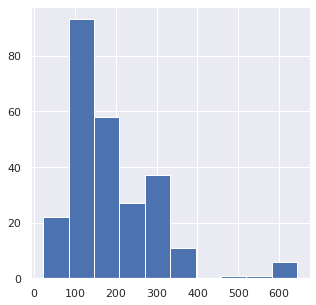

In [ ]:
insu_1.hist()

In [ ]:
box = data.groupby('Outcome', as_index=False).agg({'Insulin':'mean'})
box

,Outcome,Insulin
0,0,132.202305
1,1,187.268910


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


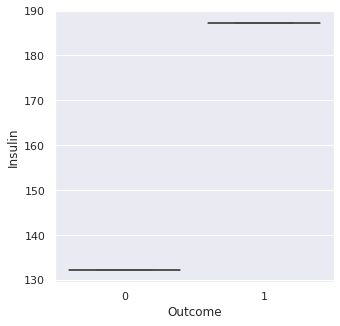

In [ ]:
sns.set(rc = {'figure.figsize':(5,5)})


x = box.Outcome
y = box.Insulin

sns.boxplot(x,y)

In [ ]:
mannwhitneyu(insu_0, insu_1)


MannwhitneyuResult(statistic=42496.5, pvalue=6.13222387194969e-17)

# MODELACION

### Revision 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.07010681732376883, 1.4593525866863526e-09)


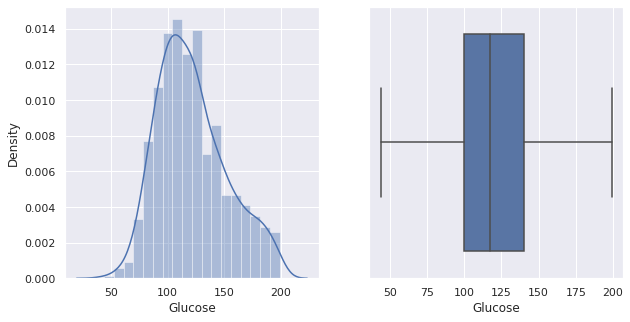


(0.0387532147603421, 0.008289345639049737)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


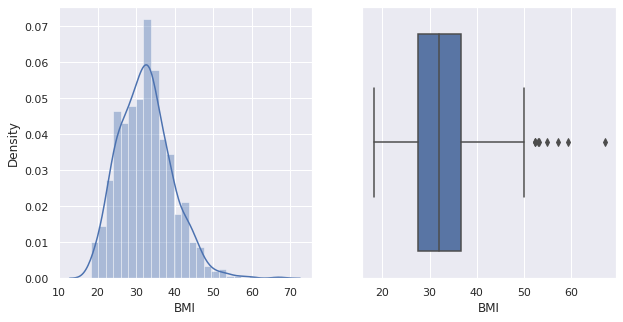


(0.17173938259001842, 1.192512781373261e-62)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


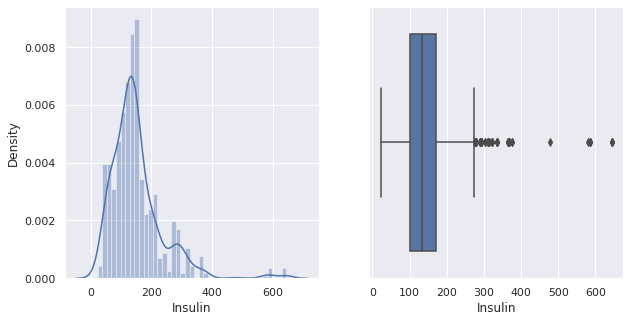

In [ ]:
for columna in data[['Glucose', 'BMI', 'Insulin']]:
  fig, ax = plt.subplots(1,2, figsize=(10, 5))
  sns.distplot(data[columna], kde=True, ax=ax[0])
  sns.boxplot(data[columna], orient='h', ax=ax[1])
  print(diagnostic.kstest_normal(data[columna]))
  plt.show()
  print('')


<Figure size 1080x576 with 0 Axes>

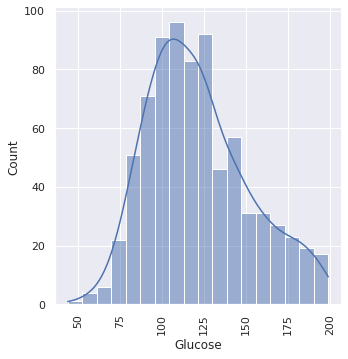

In [ ]:
plt.figure()
sns.displot(data['Glucose'], kde=True)
plt.xticks(rotation=90);

### Preprocesamiento/Estandarizacion

In [ ]:
predata = data.drop('Outcome', axis= 1)
predata

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.00,277.500000,33.6,0.627,50
1,1,85.0,66.0,29.00,49.000000,26.6,0.351,31
2,8,183.0,64.0,31.31,151.418256,23.3,0.672,32
3,1,89.0,66.0,23.00,60.250000,28.1,0.167,21
4,0,137.0,40.0,35.00,158.000000,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00,142.750000,32.9,0.171,63
764,2,122.0,70.0,27.00,168.000000,36.8,0.340,27
765,5,121.0,72.0,23.00,111.500000,26.2,0.245,30
766,1,126.0,60.0,31.72,132.428571,30.1,0.349,47


In [ ]:
cols = predata.columns

In [ ]:
datastan = pd.DataFrame(StandardScaler().fit_transform(predata), columns= cols )
datastan

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865276,-0.021044,0.635174,1.449825e+00,0.167255,0.468492,1.425995
1,-0.844885,-1.205989,-0.516583,-0.043366,-1.177716e+00,-0.851535,-0.365061,-0.190672
2,1.233880,2.015979,-0.681762,0.217872,3.921885e-15,-1.331821,0.604397,-0.105584
3,-0.844885,-1.074480,-0.516583,-0.721905,-1.048352e+00,-0.633222,-0.920763,-1.041549
4,-1.141852,0.503626,-2.663916,0.635174,7.568405e-02,1.549899,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.679954,0.309315,2.105342,-9.967703e-02,0.065376,-0.908682,2.532136
764,-0.547919,0.010468,-0.186224,-0.269546,1.906749e-01,0.632988,-0.398282,-0.531023
765,0.342981,-0.022409,-0.021044,-0.721905,-4.590235e-01,-0.909751,-0.685193,-0.275760
766,-0.844885,0.141977,-1.012121,0.264239,-2.183640e-01,-0.342140,-0.371101,1.170732


## Modelo Regresion Lineal

### Regresion Lineal con todas las variables

In [ ]:
X = data.drop('Outcome', axis= 1)
y = data.Outcome

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

In [ ]:
modelo_1 = LinearRegression()
modelo_1.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_predict = modelo_1.predict(X_train)
#y_predict  #muchos cercanos a uno y cero

In [ ]:
y_predict = np.where(y_predict>=0.5, 1, 0 )
y_predict = pd.Series(y_predict, name = 'Predict')
y_predict

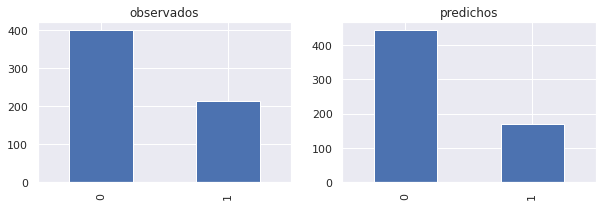

In [ ]:
fig = plt.figure(figsize=(10,10)) 
fig_dims = (3, 2)

plt.subplot2grid(fig_dims, (0, 0))
y_train.value_counts().plot(kind='bar', title='observados')
plt.subplot2grid(fig_dims, (0, 1))
y_predict.value_counts().plot(kind='bar', title='predichos')

In [ ]:
y_train.shape, y_predict.shape

((614,), (614,))

In [ ]:
tabla = zip(y_test, y_predict)
df_predict = pd.DataFrame(tabla, columns=['observed', 'predicted'])
#df_predict

In [ ]:
df_predict[df_predict['predicted'] == 1] #30 errores

In [ ]:
mean_squared_error(y_train, y_predict)

0.22312703583061888

In [ ]:
modelo_1.score(X_train, y_train)

0.3307793010243032

In [ ]:
modelo_1.score(X_test, y_test)

0.2793045587685389

In [ ]:
#REVISAR!

X = sm.add_constant(data)
y = data.Outcome
modelo = sm.OLS(y, X).fit()
print(modelo.summary())

#es un mal modelo, debo buscar rechazar la variable, el p>|t| debe ser menos a 0.05. el f-est es alto y su probabilidad es cero. 
#rcuadrado alto y estadisticos bajo es contradictorio.

                            OLS Regression Results                            
Dep. Variable:                Outcome   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.603e+29
Date:                Wed, 25 May 2022   Prob (F-statistic):               0.00
Time:                        17:55:18   Log-Likelihood:                 24245.
No. Observations:                 768   AIC:                        -4.847e+04
Df Residuals:                     758   BIC:                        -4.842e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


### Regresion Lineal con las 3 mas correlacionadas

In [ ]:
X= data[['Glucose', 'BMI', 'Insulin']]
y= data.Outcome

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 3), (154, 3), (614,), (154,))

In [ ]:
modelo_1_2 = LinearRegression()
modelo_1_2.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_predict = modelo_1_2.predict(X_train)


In [ ]:
y_predict = np.where(y_predict>=0.5, 1, 0 )
y_predict = pd.Series(y_predict, name = 'Predict')
y_predict

In [ ]:
tabla = zip(y_test, y_predict)
df_predict = pd.DataFrame(tabla, columns=['observed', 'predicted'])


In [ ]:
df_predict[df_predict['predicted'] == 1] # 27 errores

In [ ]:
mean_squared_error(y_train, y_predict)

0.23941368078175895

In [ ]:
modelo_1_2.score(X_train, y_train)

0.2877212439850436

In [ ]:
modelo_1_2.score(X_test, y_test)

0.2739454966138549

In [ ]:
X = sm.add_constant(data[['Glucose', 'BMI', 'Insulin']])
y = data.Outcome
modelo = sm.OLS(y, X).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                Outcome   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     101.5
Date:                Wed, 25 May 2022   Prob (F-statistic):           2.51e-55
Time:                        17:54:28   Log-Likelihood:                -391.80
No. Observations:                 768   AIC:                             791.6
Df Residuals:                     764   BIC:                             810.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9832      0.084    -11.654      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


## Modelo Regresion Logística

### Con datos estandarizados

In [ ]:
X = data.drop('Outcome', axis=1)
y = data.Outcome

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_scaler = StandardScaler().fit(X_train)  #calculo 
X_train = X_scaler.transform(X_train)  #distancias 

#No se aplica a la variable dependiente

In [ ]:
modelo_2 = LogisticRegression(solver = 'liblinear')
modelo_2.fit(X_train, y_train) 

LogisticRegression(solver='liblinear')

In [ ]:
X_test = X_scaler.transform(X_test) # utiliza la media del conjunto de entrenamiento 

In [ ]:
y_pred = modelo_2.predict(X_test)

In [ ]:
df_predict = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_predict[df_predict['Predicted'] == 1] #12 errores

In [ ]:
modelo_2.score(X_train, y_train)


0.7752442996742671

In [ ]:
metrics.accuracy_score(y_test, y_pred)

0.7467532467532467

In [ ]:
class_names = ['No_diabético', 'Diabético']

print(classification_report(y_train, modelo_2.predict(X_train), target_names=class_names))
print('%%%%'*30, '\n')
print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

No_diabético       0.80      0.89      0.84       403
   Diabético       0.73      0.57      0.64       211

    accuracy                           0.78       614
   macro avg       0.76      0.73      0.74       614
weighted avg       0.77      0.78      0.77       614

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% 

              precision    recall  f1-score   support

No_diabético       0.77      0.89      0.82        97
   Diabético       0.74      0.54      0.63        57

    accuracy                           0.76       154
   macro avg       0.75      0.72      0.72       154
weighted avg       0.76      0.76      0.75       154



#### **Roc/auc**

In [ ]:
modelo_2.predict_proba(X).shape #diabeticos y no diabeticos

(768, 2)

In [ ]:
y_pred_prob = modelo_2.predict_proba(X)[::, 1]
(y_pred_prob)


768

In [ ]:
type(y_pred_prob)

numpy.ndarray

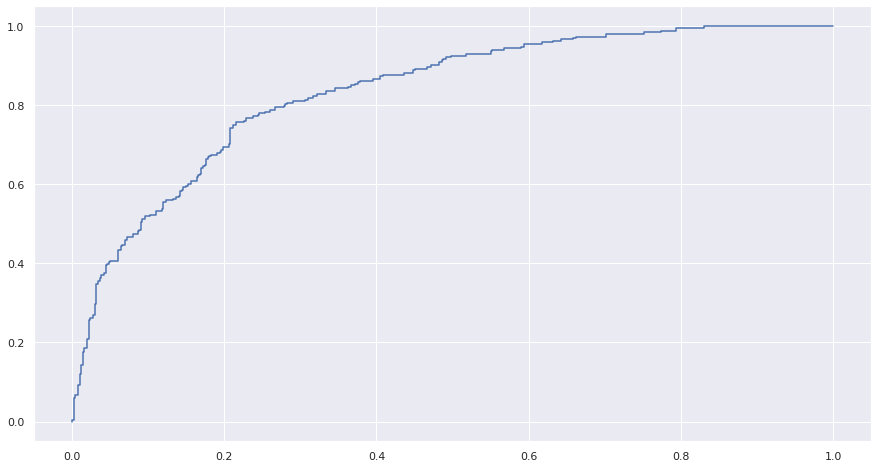

In [ ]:
false, true, prob = roc_curve(y, y_pred_prob)
auc = roc_auc_score(y, y_pred_prob)
plt.plot(false, true)

In [ ]:
auc # 17% de error en este modelo

0.8341119402985074

### Con datos no estandarizados

In [ ]:
X = data.drop('Outcome', axis=1)
y = data.Outcome

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
modelo_2stan = LogisticRegression(solver='liblinear')
modelo_2stan.fit(X_train, y_train)


LogisticRegression(solver='liblinear')

In [ ]:
y_pred = modelo_2stan.predict(X_test)

In [ ]:
df_predict = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_predict[df_predict['Predicted'] == 1] # 11 errores


In [ ]:
modelo_2stan.score(X_train, y_train)

0.754071661237785

In [ ]:
              
metrics.accuracy_score(y_test, y_pred)

0.8051948051948052

In [ ]:
class_names = ['No_diabético', 'Diabético']
print(classification_report(y_train, modelo_2stan.predict(X_train), target_names=class_names))
print('%%%%'*30, '\n')
print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

No_diabético       0.78      0.86      0.82       392
   Diabético       0.70      0.56      0.62       222

    accuracy                           0.75       614
   macro avg       0.74      0.71      0.72       614
weighted avg       0.75      0.75      0.75       614

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% 

              precision    recall  f1-score   support

No_diabético       0.81      0.94      0.87       108
   Diabético       0.77      0.50      0.61        46

    accuracy                           0.81       154
   macro avg       0.79      0.72      0.74       154
weighted avg       0.80      0.81      0.79       154



#### roc/auc

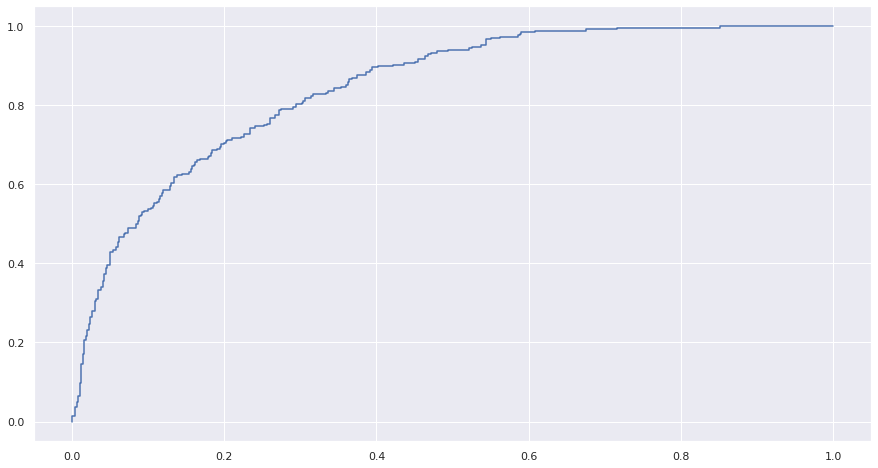

In [ ]:
y_pred_prob = modelo_2stan.predict_proba(X)[::, 1]

false, true, prob = roc_curve(y, y_pred_prob)
auc = roc_auc_score(y, y_pred_prob)
plt.plot(false, true)


In [ ]:
  auc # 16% de error en este modelo


0.8447164179104477

## Modelo Random forest

### Sin datos estandarizados

In [ ]:
X = data.drop('Outcome', axis=1)
y = data.Outcome

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
params = {'max_depth': 7} #cambiar hp
modelo_3 = DecisionTreeClassifier(**params)
modelo_3.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=7)

In [ ]:
y_predict = modelo_3.predict(X_test) 
y_predict

In [ ]:
modelo_3.score(X_train, y_train)

0.8941368078175895

In [ ]:
class_names = ['No dibético', 'Diabtético']

print(classification_report(y_train, modelo_3.predict(X_train), target_names=class_names))
print('%%%%'*30, '\n\n')
print(classification_report(y_test, modelo_3.predict(X_test), target_names=class_names))

#sintoma de overfitting, 88 en train, 68 en test

# el overfitting lo da el no diabetico, se debería tener como support 50/50

              precision    recall  f1-score   support

 No dibético       0.92      0.90      0.91       400
  Diabtético       0.82      0.86      0.84       214

    accuracy                           0.88       614
   macro avg       0.87      0.88      0.87       614
weighted avg       0.89      0.88      0.89       614

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% 


              precision    recall  f1-score   support

 No dibético       0.77      0.72      0.74       100
  Diabtético       0.53      0.59      0.56        54

    accuracy                           0.68       154
   macro avg       0.65      0.66      0.65       154
weighted avg       0.68      0.68      0.68       154



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


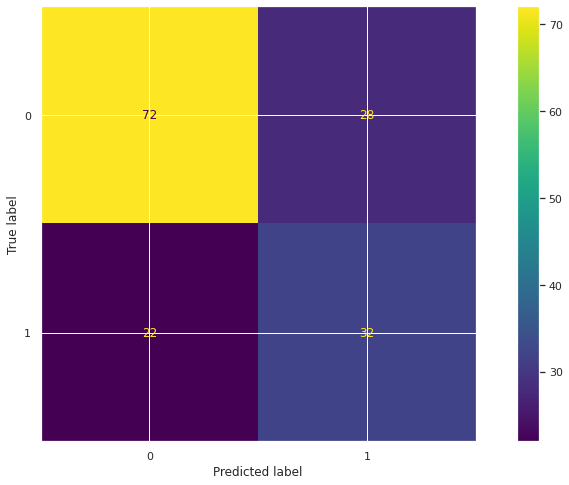

In [ ]:
metrics.plot_confusion_matrix(modelo_3, X_test, y_test); 

#28 FP, 22 FN = 50 falsos

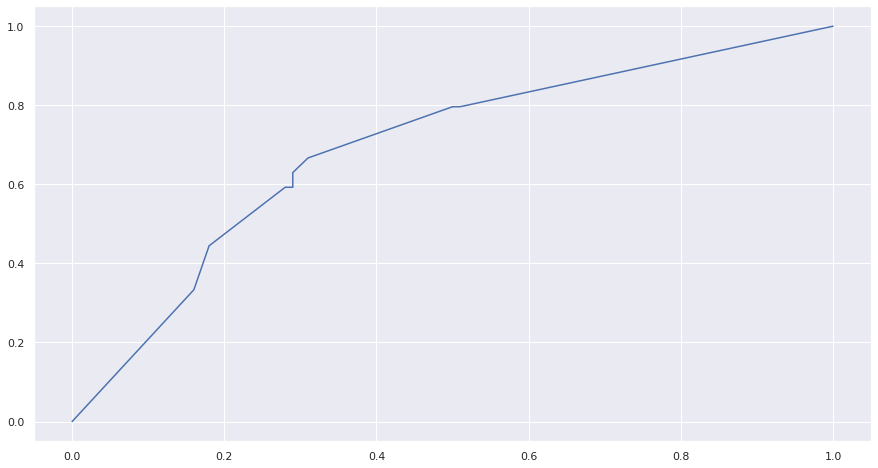

In [ ]:
y_pred_prob = modelo_3.predict_proba(X_test)[::, 1]

false, true, perc = metrics.roc_curve(y_test, y_pred_prob)
auc = metrics.roc_auc_score(y_test, y_pred_prob)

plt.plot(false, true);

In [ ]:
auc

0.6922222222222222

### Con datos estandarizados

In [ ]:
X = data.drop('Outcome', axis=1)
y = data.Outcome

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_scaler = StandardScaler().fit(X_train)  #calculo 
X_train = X_scaler.transform(X_train)  #distancias 

In [ ]:
params = {'max_depth': 7} #cambiar hp
modelo_3stan = DecisionTreeClassifier(**params)
modelo_3stan.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=7)

In [ ]:
X_test = X_scaler.transform(X_test)


In [ ]:
y_predict = modelo_3stan.predict(X_test) 

In [ ]:
modelo_3stan.score(X_train, y_train)

0.8762214983713354

In [ ]:
class_names = ['No dibético', 'Diabtético']

print(classification_report(y_train, modelo_3stan.predict(X_train), target_names=class_names))
print('%%%%'*30, '\n\n')
print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

 No dibético       0.88      0.95      0.91       408
  Diabtético       0.87      0.74      0.80       206

    accuracy                           0.88       614
   macro avg       0.88      0.84      0.86       614
weighted avg       0.88      0.88      0.87       614

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% 


              precision    recall  f1-score   support

 No dibético       0.59      0.79      0.68        92
  Diabtético       0.37      0.18      0.24        62

    accuracy                           0.55       154
   macro avg       0.48      0.49      0.46       154
weighted avg       0.50      0.55      0.50       154



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


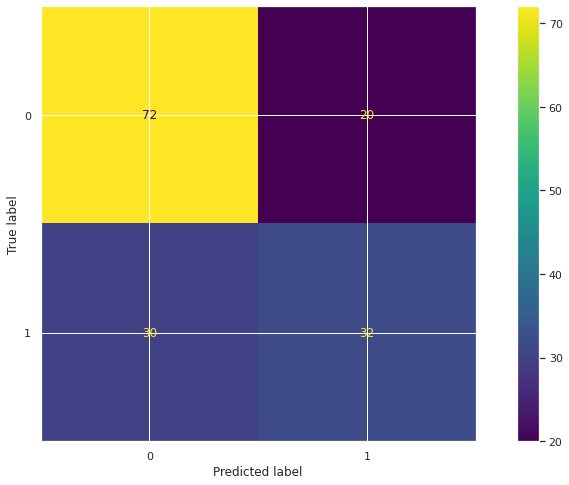

In [ ]:
metrics.plot_confusion_matrix(modelo_3stan, X_test, y_test); 

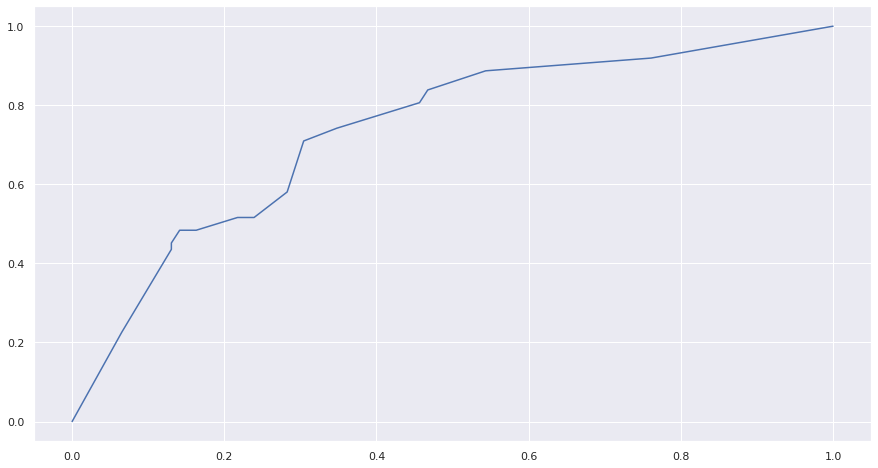

In [ ]:
y_pred_prob = modelo_3stan.predict_proba(X_test)[::, 1]

false, true, perc = metrics.roc_curve(y_test, y_pred_prob)
auc = metrics.roc_auc_score(y_test, y_pred_prob)

plt.plot(false, true);

In [ ]:
auc

0.7369389901823282

## Modelo Random Forest Classifier

### Sin datos estandarizados

In [ ]:
X = data.drop('Outcome', axis=1)
y = data.Outcome

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
modelo_4 = RandomForestClassifier(n_estimators=100)
modelo_4.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = modelo_4.predict(X_test)
df_predict = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
#df_predict.head()

In [ ]:
modelo_4.score(X_train, y_train)

1.0

In [ ]:
class_names = ['No_diabético', 'Diabético']

print(classification_report(y_train, modelo_4.predict(X_train), target_names=class_names))
print('%%%%'*30, '\n')
print(classification_report(y_test, y_pred, target_names=class_names))
#0.75 buen valor

              precision    recall  f1-score   support

No_diabético       1.00      1.00      1.00       406
   Diabético       1.00      1.00      1.00       208

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% 

              precision    recall  f1-score   support

No_diabético       0.75      0.91      0.83        94
   Diabético       0.80      0.53      0.64        60

    accuracy                           0.77       154
   macro avg       0.78      0.72      0.73       154
weighted avg       0.77      0.77      0.75       154



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


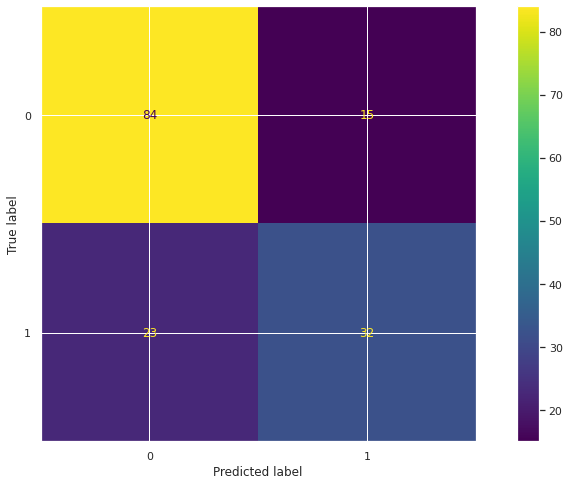

In [ ]:
metrics.plot_confusion_matrix(modelo_4, X_test, y_test); 


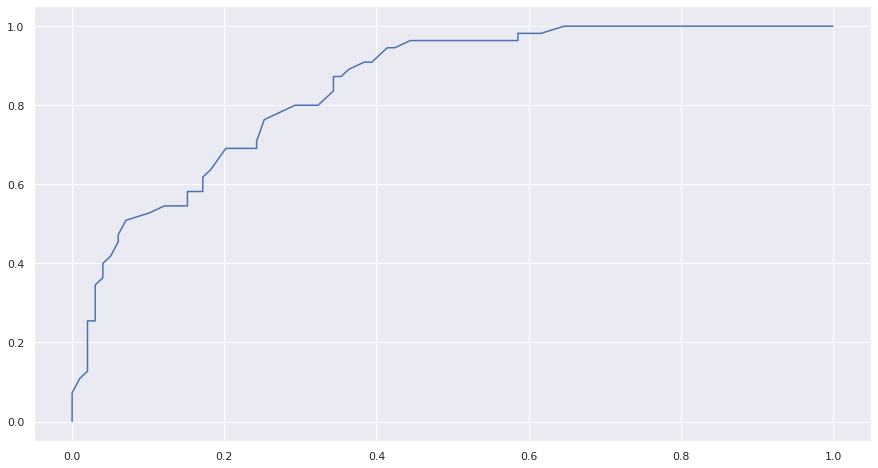

In [ ]:
y_pred_prob = modelo_4.predict_proba(X_test)[::, 1]

false, true, perc = metrics.roc_curve(y_test, y_pred_prob)
auc = metrics.roc_auc_score(y_test, y_pred_prob)

plt.plot(false, true);

In [ ]:
auc

0.8462809917355372

### Con datos estandarizados

In [ ]:
	X = data.drop('Outcome', axis=1)
	y = data.Outcome

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [ ]:
X_scaler = StandardScaler().fit(X_train) 
X_train = X_scaler.transform(X_train) 

In [ ]:
modelo_4stan = RandomForestClassifier(n_estimators=100)
modelo_4stan.fit(X_train, y_train)	


RandomForestClassifier()

In [ ]:
X_test = X_scaler.transform(X_test)


In [ ]:
y_pred = modelo_4stan.predict(X_test)
df_predict = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
#df_predict.head()

In [ ]:
modelo_4stan.score(X_train, y_train)

1.0

In [ ]:
class_names = ['No_diabético', 'Diabético']

print(classification_report(y_train, modelo_4stan.predict(X_train), target_names=class_names))
print('%%%%'*30, '\n')
print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

No_diabético       1.00      1.00      1.00       403
   Diabético       1.00      1.00      1.00       211

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% 

              precision    recall  f1-score   support

No_diabético       0.81      0.81      0.81        97
   Diabético       0.68      0.68      0.68        57

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


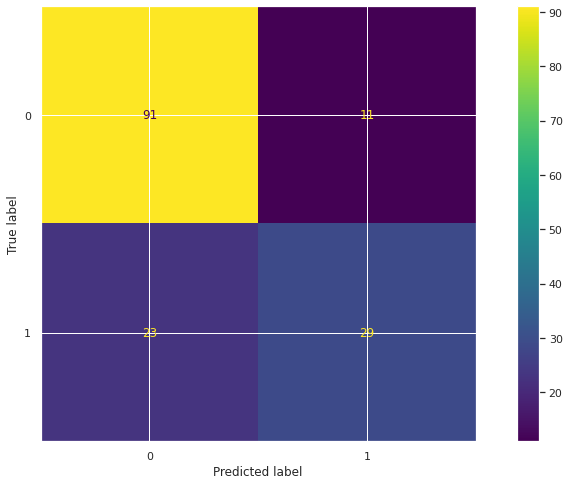

In [ ]:
metrics.plot_confusion_matrix(modelo_4stan, X_test, y_test); 

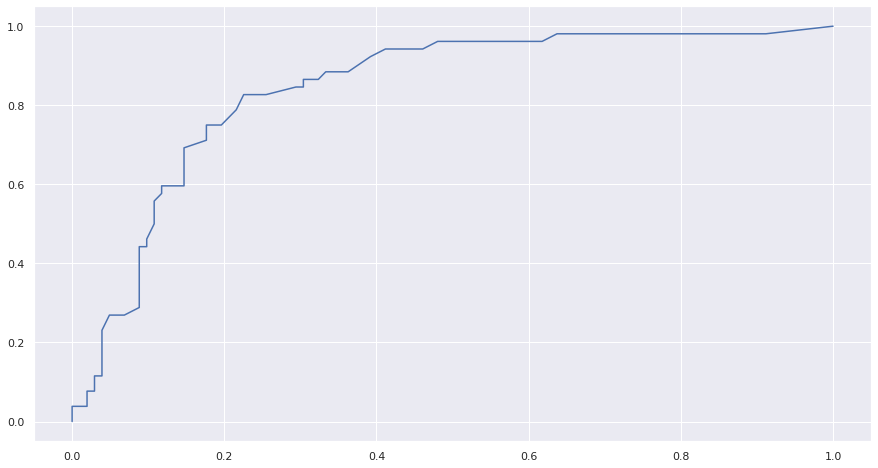

In [ ]:
y_pred_prob = modelo_4stan.predict_proba(X_test)[::, 1]

false, true, perc = metrics.roc_curve(y_test, y_pred_prob)
auc = metrics.roc_auc_score(y_test, y_pred_prob)
plt.plot(false, true);


In [ ]:
auc

0.8406862745098039

## Modelo SVM

In [ ]:
X = data.drop('Outcome', axis=1)
y = data.Outcome

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
modelo_5 = LinearSVC()
modelo_5.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC()

In [ ]:
y_pred = modelo_5.predict(X_train)


In [ ]:
modelo_5.score(X_train, y_train)

0.36482084690553745

In [ ]:
class_names=['No_diabetico', 'Diabético']
print(classification_report(y_train, y_pred, target_names=class_names))
print('%%%%'*30, '\n\n')
print(classification_report(y_test, modelo_5.predict(X_test), target_names=class_names))

              precision    recall  f1-score   support

No_diabetico       0.89      0.32      0.47       399
   Diabético       0.42      0.93      0.58       215

    accuracy                           0.53       614
   macro avg       0.66      0.62      0.52       614
weighted avg       0.73      0.53      0.51       614

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% 


              precision    recall  f1-score   support

No_diabetico       0.95      0.35      0.51       101
   Diabético       0.44      0.96      0.60        53

    accuracy                           0.56       154
   macro avg       0.69      0.65      0.55       154
weighted avg       0.77      0.56      0.54       154



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


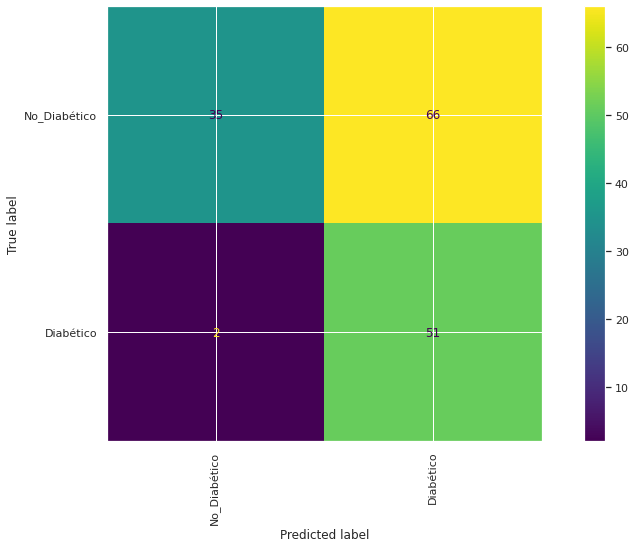

In [ ]:
metrics.plot_confusion_matrix(modelo_5, X_test, y_test,
                              display_labels=['No_Diabético', 'Diabético'],
                              xticks_rotation='vertical')


## Modelo Vecinos Cercanos

### Sin datos estandarizados

In [ ]:
X = data.drop('Outcome', axis=1)
y = data.Outcome

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
class_names = ['No_diabético', 'Diabético']

for i in range (10, 110, 10):
  modelo_6 = neighbors.KNeighborsClassifier(n_neighbors= i, algorithm = 'auto', p=2)
  modelo_6.fit(X_train, y_train)
  y_pred = modelo_6.predict(X_test)
  print(classification_report(y_train, modelo_6.predict(X_train), target_names=class_names))
  print('%%%%'*30, '\n')
  print(classification_report(y_test, y_pred, target_names=class_names), '\n\n')
  
  #Los datos se aprendieron la media, van mejorando en cada iteracion

### Con datos estandarizados

In [ ]:
X = data.drop('Outcome', axis=1)
y = data.Outcome

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_scaler = StandardScaler().fit(X_train)   
X_train = X_scaler.transform(X_train)   


In [ ]:
X_test = X_scaler.transform(X_test) # utiliza la media del conjunto de entrenamiento 

In [ ]:
class_names = ['No_diabético', 'Diabético']

for i in range (10, 110, 10):
  modelo_6stan = neighbors.KNeighborsClassifier(n_neighbors= i, algorithm = 'auto', p=2)
  modelo_6stan.fit(X_train, y_train)
  y_pred = modelo_6stan.predict(X_test)
  print(f'con {i} vecinos \n')
  print(classification_report(y_train, modelo_6stan.predict(X_train), target_names=class_names))
  print('%%%%'*30, '\n')
  print(classification_report(y_test, y_pred, target_names=class_names))


print(metrics.plot_confusion_matrix(modelo_6stan, X_test, y_test))
#accuracy mas alto 0.75 con 50 vecinos

## Modelo Naive-Bayes

### Sin datos estandarizados

In [ ]:
X = data.drop('Outcome', axis= 1)
y = data.Outcome

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
modelo_7 = GaussianNB()
modelo_7.fit(X_train, y_train)


GaussianNB()

In [ ]:
y_pred = modelo_7.predict(X_test)

In [ ]:
modelo_7.score(X_train, y_train)

0.7638436482084691

In [ ]:
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))
#FN y FP

Number of mislabeled points out of a total 154 points : 38


In [ ]:
df_predict = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_predict[df_predict['Predicted'] == 1] # 17 FN

In [ ]:
class_names = ['No_diabético', 'Diabético']

print(classification_report(y_train, modelo_7.predict(X_train), target_names=class_names))
print('%%%%'*30, '\n')
print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

No_diabético       0.80      0.84      0.82       398
   Diabético       0.68      0.62      0.65       216

    accuracy                           0.76       614
   macro avg       0.74      0.73      0.74       614
weighted avg       0.76      0.76      0.76       614

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% 

              precision    recall  f1-score   support

No_diabético       0.79      0.85      0.82       102
   Diabético       0.66      0.56      0.60        52

    accuracy                           0.75       154
   macro avg       0.72      0.71      0.71       154
weighted avg       0.75      0.75      0.75       154



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


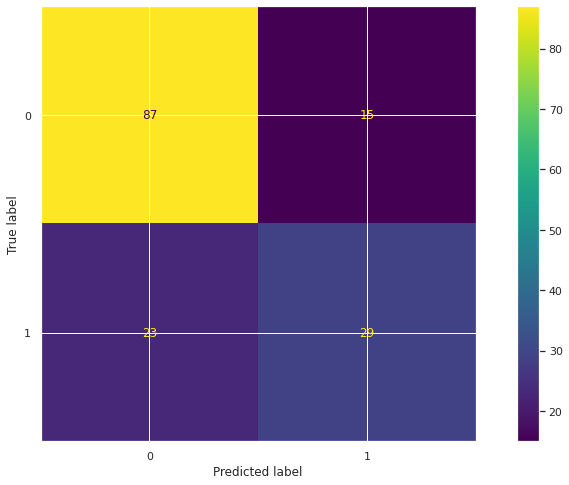

In [ ]:
metrics.plot_confusion_matrix(modelo_7, X_test, y_test); 

### Con datos estandarizados

In [ ]:
X = data.drop('Outcome', axis=1)
y = data.Outcome

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_scaler = StandardScaler().fit(X_train) 
X_train = X_scaler.transform(X_train) 

In [ ]:
modelo_7stan = GaussianNB()
modelo_7stan.fit(X_train, y_train)

GaussianNB()

In [ ]:
X_test = X_scaler.transform(X_test)

In [ ]:
y_pred = modelo_7stan.predict(X_test)

In [ ]:
df_predict = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_predict[df_predict['Predicted'] == 1] #17 errores

In [ ]:
modelo_7stan.score(X_train, y_train)

0.758957654723127

In [ ]:
class_names = ['No_diabético', 'Diabético']

print(classification_report(y_train, modelo_7stan.predict(X_train), target_names=class_names))
print('%%%%'*30, '\n')
print(classification_report(y_test, y_pred, target_names=class_names), '\n\n')

              precision    recall  f1-score   support

No_diabético       0.80      0.83      0.82       397
   Diabético       0.67      0.62      0.65       217

    accuracy                           0.76       614
   macro avg       0.74      0.73      0.73       614
weighted avg       0.76      0.76      0.76       614

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% 

              precision    recall  f1-score   support

No_diabético       0.81      0.86      0.84       103
   Diabético       0.68      0.59      0.63        51

    accuracy                           0.77       154
   macro avg       0.75      0.73      0.73       154
weighted avg       0.77      0.77      0.77       154
 




/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


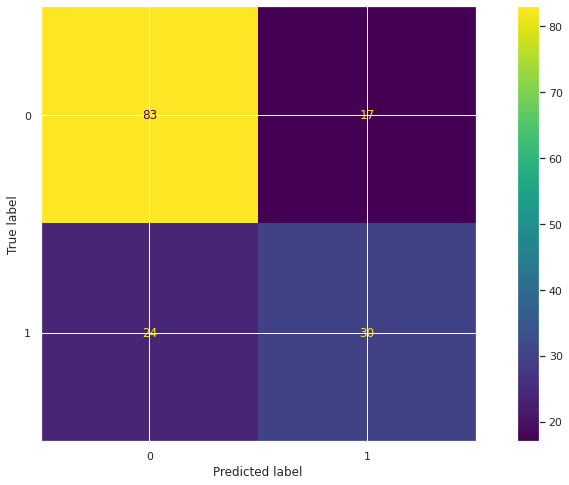

In [ ]:
metrics.plot_confusion_matrix(modelo_7stan, X_test, y_test); 

# Notas

In [ ]:
#antes d ela limpieza / realizar despues de la limpieza hacer correlaciones   x
# reducir el dataset para realizar correlaciones.                             o
# una vez obtenida : test de hipotesis-  correlaciones, prueba de hipotesis, prueba z,

In [ ]:

y tes de hipotesis con dos muestrass. 

In [ ]:
Para machine learning- regresion logistica (), ROC, random forest,  


# de los modelos de clasificacion evaluar los datos. 
#mODELOS DE CLASIFICACIOn
# usar el 100%, después usar pareto, y casos aislados. 
no supervisado arbol de desicion #

matriz de confusion para evaluar los tres modelos.

Terminar todo y depues regresar sobre lo contruido.


Modelos logisticos

Naive-Bayes, regresion logistica --> mandar matriz y reporte de clasiicacion con datos estandarizados
vecinos cercanos x

k medias
xgboos

si:
estandarizar -> regresion logistica sube a 80 ->> buen modelo
sino:
sin estandarizar -> modelos xgboss, naive-Bayes, vecinos cercanos



In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import RobustScaler

In [ ]:
dataset= fetch_california_housing()
type(dataset)

sklearn.utils.Bunch

In [ ]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [ ]:
dataset.DESCR

In [ ]:
df = pd.DataFrame(dataset['data'], columns = dataset['feature_names'])

In [ ]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [ ]:
print(classification_report(y_train, model_1.predict(X_train), target_names=class_names))

print('%%%%'*30)
print()

print(classification_report(y_test, y_pred, target_names=class_names))


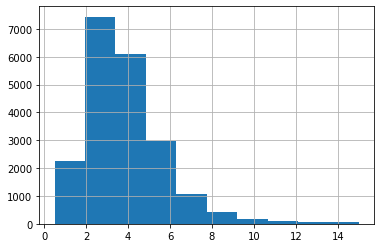

In [ ]:
df.MedInc.hist()

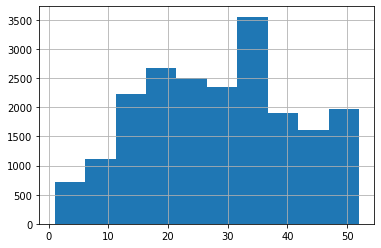

In [ ]:
df.HouseAge.hist()

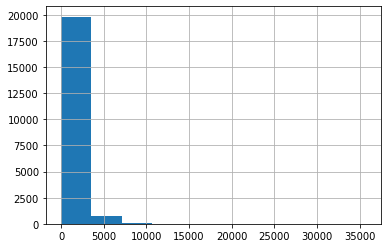

In [ ]:
df.Population.hist()

In [ ]:
df = pd.DataFrame(StandardScaler().fit_transform(df), columns= dataset['feature_names'])
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329,1.038503,-1.337818
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616,1.038503,-1.337818
...,...,...,...,...,...,...,...,...
20635,-1.216128,-0.289187,-0.155023,0.077354,-0.512592,-0.049110,1.801647,-0.758826
20636,-0.691593,-0.845393,0.276881,0.462365,-0.944405,0.005021,1.806329,-0.818722
20637,-1.142593,-0.924851,-0.090318,0.049414,-0.369537,-0.071735,1.778237,-0.823713
20638,-1.054583,-0.845393,-0.040211,0.158778,-0.604429,-0.091225,1.778237,-0.873626


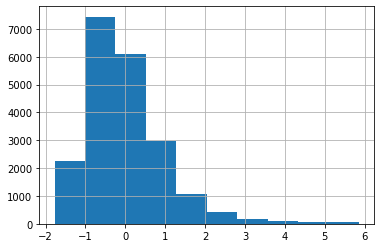

In [ ]:
df.MedInc.hist()

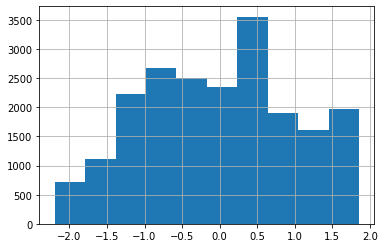

In [ ]:
df.HouseAge.hist()

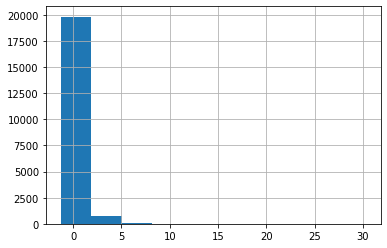

In [ ]:
df.Population.hist()

In [ ]:
df[0]

array([ 2.34476576,  0.98214266,  0.62855945, -0.15375759, -0.9744286 ,
       -0.04959654,  1.05254828, -1.32783522])

In [ ]:
X_full, y_full = dataset.data, dataset.target #datasets
feature_names = dataset.feature_names #lista de nombres

In [ ]:
X_full.shape, y_full.shape

((20640, 8), (20640,))

In [ ]:
feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [ ]:
features = ["MedInc", "AveOccup"] #lista de nombres
features_idx = [feature_names.index(feature) for feature in features] #indices
X = X_full[:, features_idx]

In [ ]:
features_idx

[0, 5]

In [ ]:
X.shape

(20640, 2)

In [ ]:
X

array([[8.3252    , 2.55555556],
       [8.3014    , 2.10984183],
       [7.2574    , 2.80225989],
       ...,
       [1.7       , 2.3256351 ],
       [1.8672    , 2.12320917],
       [2.3886    , 2.61698113]])

In [ ]:
distributions = [("Unscaled data", X),
    ("Data after standard scaling", StandardScaler().fit_transform(X)),
    ("Data after robust scaling", RobustScaler(quantile_range=(25, 75)).fit_transform(X),)]

In [ ]:
(distributions[0][1])

array([[8.3252    , 2.55555556],
       [8.3014    , 2.10984183],
       [7.2574    , 2.80225989],
       ...,
       [1.7       , 2.3256351 ],
       [1.8672    , 2.12320917],
       [2.3886    , 2.61698113]])

In [ ]:
distributions[1][1]

array([[ 2.34476576, -0.04959654],
       [ 2.33223796, -0.09251223],
       [ 1.7826994 , -0.02584253],
       ...,
       [-1.14259331, -0.0717345 ],
       [-1.05458292, -0.09122515],
       [-0.78012947, -0.04368215]])